In [106]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

df = pd.read_csv("data/train.csv")

In [107]:
# mapping dicts
building_type_dict = {"1Fam": 1,"2fmCon": 2,"Duplex": 3,"TwnhsE": 4,"Twnhs": 5,}
house_style_dict = {'2Story': 1,'1Story': 2,'1.5Fin': 3,'1.5Unf': 4,'SFoyer': 5,'SLvl': 6,'2.5Unf': 7,'2.5Fin': 8}

In [108]:
# get relevant parameters
df1 = df[["LotArea","BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt","GarageCars","SalePrice",]].copy()
df1["BldgType"] = df1["BldgType"].map(building_type_dict)
df1["HouseStyle"] = df1["HouseStyle"].map(house_style_dict)

In [109]:
# input and output datsets
X = df1.drop(columns=["SalePrice"])
y = df1["SalePrice"]

In [81]:
# create the model and save it
# model = DecisionTreeClassifier()
# model.fit(X,y)
# joblib.dump(model, "model.joblib")

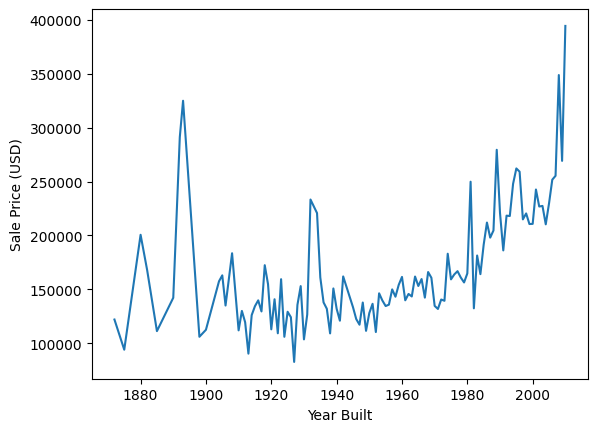

In [110]:
# make the graphs
import matplotlib.pyplot as plt

# average price line chart
plt.xlabel("Year Built")
plt.ylabel("Sale Price (USD)")
# plt.title("Housing prices across the years")

average_prices = df1.groupby("YearBuilt")["SalePrice"].mean().reset_index()
df1.groupby("YearBuilt").mean().reset_index()

plt.plot(average_prices["YearBuilt"],average_prices["SalePrice"],)

In [131]:
# prepare df2 for charts
df2 = df[["LotArea","BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt","GarageCars","SalePrice",]].copy()

building_type_desc = building_type_mapping = {"1Fam": "Single Family Home","2fmCon": "Two-family Conversion","Duplex": "Duplex","TwnhsE": "Townhouse End Unit","Twnhs": "Townhouse Inside Unit"}
df2["BldgType"] = df2["BldgType"].map(building_type_desc)

house_style_desc = {"1Story": "Single Story","2Story": "Two Story","1.5Fin": "One and a Half Finished","SLvl": "Split Level","SFoyer": "Split Foyer","1.5Unf": "One and a Half Unfinished","2.5Unf": "Two and a Half Unfinished", "2.5Fin": "Two and a Half Finished",}
df2["HouseStyle"] = df2["HouseStyle"].map(house_style_desc)

building_types_count = df2["BldgType"].value_counts()

house_styles_count = df2["HouseStyle"].value_counts()

([<matplotlib.patches.Wedge at 0x2889faad0>,
 [Text(-0.9565482795174809, 0.5431531910540041, 'Single Family Home'),
  Text(0.7761418242559959, -0.7794894923221064, 'Two-family Conversion'),
  Text(0.9996993112410092, -0.4589131585651605, 'Duplex'),
  Text(1.0720431777695472, -0.24642123487591547, 'Townhouse End Unit'),
  Text(1.097553633527576, -0.07332135794170491, 'Townhouse Inside Unit')])

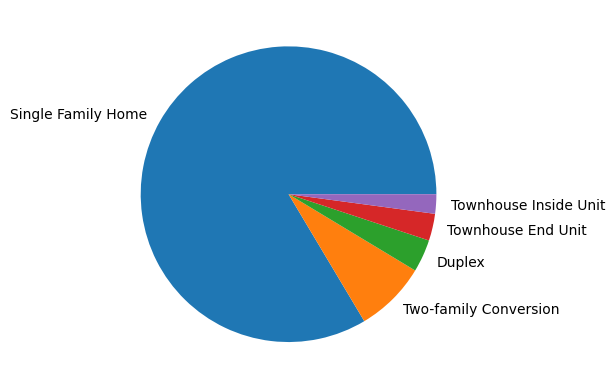

In [139]:
# Building Type Pie chart
plt.pie(building_types_count, labels=building_type_desc.values())

<BarContainer object of 8 artists>

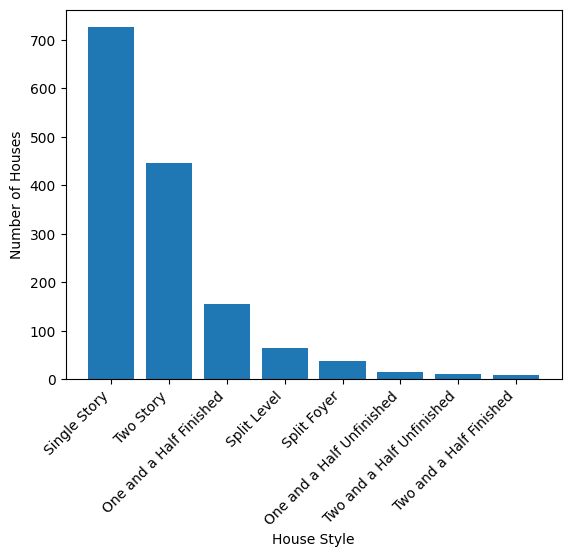

In [136]:
# House style bar chart
plt.xlabel("House Style")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45, ha="right")
plt.bar(house_style_desc.values(), house_styles_count)